In [1]:
import anndata
import os
import pathlib

import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

In [7]:
def rename_gbm_score(adata):
    adata.obs["MESlike"] = adata.obs[['mesenchymal1_score', 'mesenchymal2_score']].max(1)
    adata.obs["NPClike"] = adata.obs[['neural_precursor1_score', 'neural_precursor2_score']].max(1)

    adata.obs.rename(columns={"oligodendrocytic_precursor_score": "OPClike",
                              "astrocyte_score": "AClike"},
                              inplace=True)
    return adata

In [9]:
def gbm_neftel():
    adata = anndata.read_text("/path/to/TPM/data/from/Neftel")
    adata = adata.transpose()
    tsne_coords = pd.read_csv("/path/to/tsne/coord/from/Neftel", 
                              delimiter="\t", index_col=0).drop("TYPE")
    meta_data = pd.read_csv("/path/to/meta/data/from/Neftel", 
                            delimiter="\t", index_col=0).drop("TYPE")
    adata.obs = adata.obs.join(meta_data)
    adata.obs = adata.obs.join(tsne_coords)

    adata.obs[['MESlike2', 'MESlike1', 'AClike', 'OPClike', 'NPClike1', 'NPClike2']]= adata.obs[['MESlike2', 'MESlike1', 'AClike', 'OPClike', 'NPClike1', 'NPClike2']].astype(float)

    adata = adata[adata.obs["CellAssignment"]=="Malignant"].copy()
    adata = adata[adata.obs.notna().all(1)].copy()

    adata.obs["MESlike"] = adata.obs[['MESlike2', 'MESlike1']].max(1)
    adata.obs["NPClike"] = adata.obs[['NPClike1', 'NPClike2']].max(1)
    
    return adata

In [9]:
def get_high_corr(x): 
    if x<0.65:
        return np.nan
    else:
        return x

In [3]:
cancer_known_sigs = {"hgg_gbm": ["MESlike",  "AClike",
                             "NPClike", "OPClike"],
                     "hgg": ["MESlike",  "AClike",
                             "NPClike", "OPClike"],
                     "gbm": ["MESlike",  "AClike",
                             "NPClike", "OPClike"],
                    "scc_red": ["Basal", "Differentiated", "TSK",
                             "Cycling"],
                    }

In [5]:
cancer_types = ["gbm","hgg","hgg_gbm","scc_red"]

In [4]:
dpath_basedir = pathlib.Path("path/to/preprocessed/data")
cancer_data_path = {"hgg": dpath_basedir / "glioblastoma/2022-10-11_17-17-22/data/malignant.h5ad", 
                    "gbm": dpath_basedir / "glioblastoma_ss_neftel/_LAST", 
                   "scc_red": dpath_basedir / "scc_red/malignant_old.h5ad", }

In [6]:
base_dir = pathlib.Path("/path/to/results/from/cansig")

In [10]:
corr_metasig = {}
for cancer in cancer_types:
    print(cancer)
    name = cancer
    
    if cancer in ["gbm","hgg_gbm"]:
        adata= gbm_neftel()
        print("Downloaded adata")
        
        if cancer=="hgg_gbm":
            name = "hgg"
            
        sig_dir = base_dir / f"{name}" / "metasignatures" / "signatures"
    else:
        adata = sc.read_h5ad(cancer_data_path[cancer])
        sc.pp.normalize_total(adata)
        sc.pp.log1p(adata)
        print("Downloaded adata")
        
        if cancer=="hgg":
            adata = rename_gbm_score(adata)
        sig_dir = base_dir / f"{name}" / "metasignatures" / "signatures"
        
    metasig_names = []
    for i in range(len(list(sig_dir.iterdir()))):
        sig_path = sig_dir / f"metasig{i+1}.csv"
        sig = pd.read_csv(sig_path, index_col=0).iloc[:50, 0].tolist()
        sc.tl.score_genes(adata, gene_list=sig, score_name=f"metasig{i+1}")
        metasig_names.append(f"metasig{i+1}")
    col_to_compare = cancer_known_sigs[cancer] + metasig_names
    corr_metasig[cancer] = adata.obs[col_to_compare].corr().loc[cancer_known_sigs[cancer],metasig_names]

gbm
Downloaded adata


/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


hgg
Downloaded adata


/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future v

hgg_gbm
Downloaded adata


/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


scc_red
Downloaded adata


/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/cluster/home/jyates/Documents/home_dir/scrna/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future v

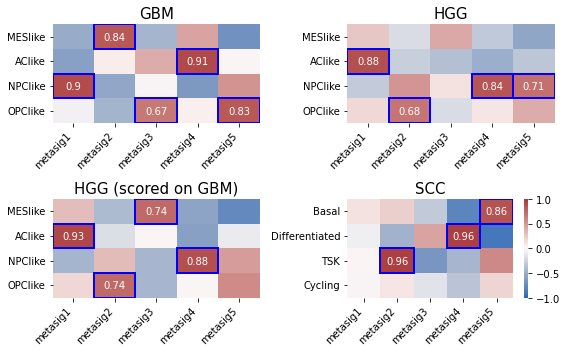

In [19]:
cancer_names = {"hgg": "HGG",
                "gbm": "GBM","hgg_gbm": "HGG (scored on GBM)",
                "scc_red": "SCC", }
fig, ax = plt.subplots(2,2,figsize=(8,5),gridspec_kw={'width_ratios': [3,3]})
flatax = ax.flatten()
hide_cbar = [False]*(len(cancer_types)-1)+[True]
for i,cancer in enumerate(cancer_types):
    
    df = corr_metasig[cancer]
    
    annot = df.applymap(get_high_corr).round(2)
    annot = annot.fillna("").astype(str)

    sns.heatmap(data=df, cmap="vlag", center=0.0, vmin=-1, vmax=1, annot=annot, fmt = '', ax=flatax[i], cbar=hide_cbar[i])
    
    column_max = df.fillna(-np.inf).idxmax(axis=0)

    for col, variable in enumerate(df.columns):
        if df[variable].max()<0.65:
            continue
        position = df.index.get_loc(column_max[variable])
        flatax[i].add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='blue', lw=2))
        
    
    flatax[i].set_xticklabels(flatax[i].get_xticklabels(),rotation="45",horizontalalignment="right")
    flatax[i].set_yticklabels(flatax[i].get_yticklabels(),rotation="0",verticalalignment="center")
    flatax[i].set_title(cancer_names[cancer], fontsize=15)


fig.tight_layout()
fig.savefig("path/to/save/fig",bbox_inches="tight",dpi=300)
fig.savefig("path/to/save/fig", bbox_inches="tight")